# Compiler

In [1]:
from quantpiler.compiler import assemble

## Basics

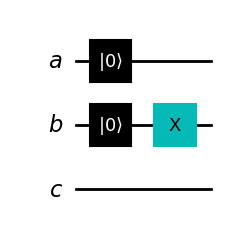

In [2]:
def assigment_func(a, b, c):
    a = False
    b = True


qc = assemble(assigment_func, 0)
qc.draw(output="mpl")

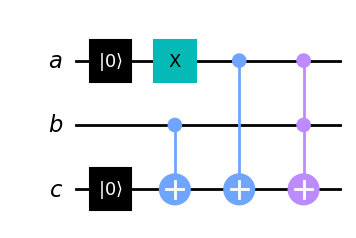

In [3]:
def new_var_func(a, b):
    a = True
    # Yes, we can create local variables
    c = a | b


qc = assemble(new_var_func, 0)
qc.draw(output="mpl")

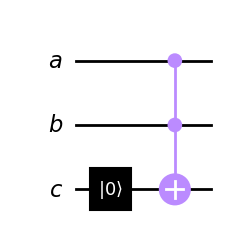

In [4]:
def and_func(a, b, c):
    c = a & b


qc = assemble(and_func, 0)
qc.draw(output="mpl")

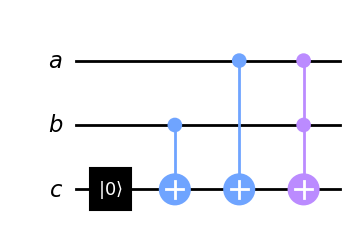

In [5]:
def or_func(a, b, c):
    c = a | b


qc = assemble(or_func, 0)
qc.draw(output="mpl")

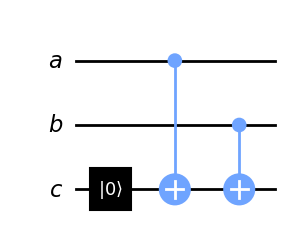

In [6]:
def xor_func(a, b, c):
    c = a != b


qc = assemble(xor_func, 0)
qc.draw(output="mpl")

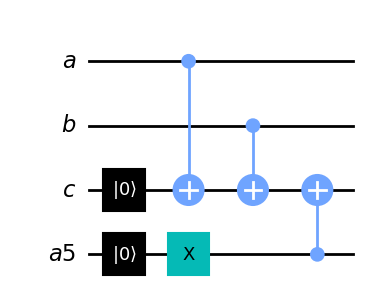

In [7]:
def equals_func(a, b, c):
    c = a == b


# For this operation we need 1 ancilla
qc = assemble(equals_func, 1)
qc.draw(output="mpl")

## Complex function

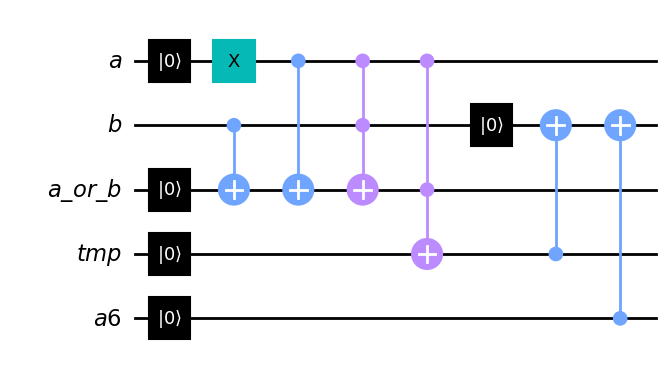

In [8]:
def example_func(a, b):
    a = True
    a_or_b = a | b
    tmp = a & a_or_b
    b = tmp != False


qc = assemble(example_func, 1)
qc.draw(output="mpl")

## Very complex function

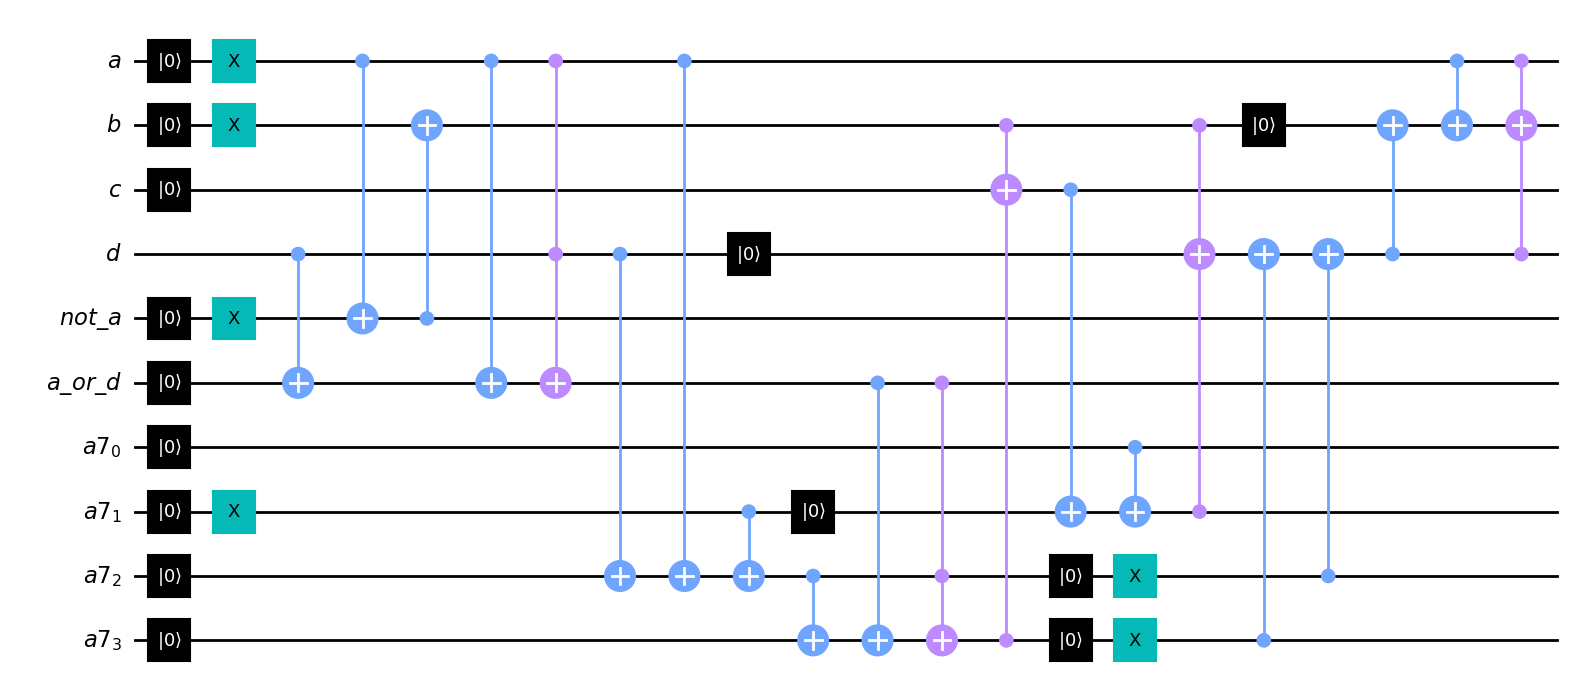

In [9]:
def complex_func(a, b, c, d):
    a = True
    not_a = not a
    b = not not_a
    a_or_d = a | d
    c = b & (a_or_d | (d == a))
    d = (c != False) & b == True
    b = a | d


qc = assemble(complex_func, 4)
qc.draw(output="mpl")